In [74]:
#データの読み込み
import pandas as pd
uselog = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/3章/use_log.csv')
print(len(uselog))
print(uselog.head())

customer = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/3章/customer_master.csv')
print(len(customer))
print(customer.head())

class_master = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/3章/class_master.csv')
print(len(class_master))
print(class_master.head())

campaign_master = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/3章/campaign_master.csv')
print(len(campaign_master))
print(campaign_master.head())

197428
            log_id customer_id     usedate
0  L00000049012330    AS009373  2018-04-01
1  L00000049012331    AS015315  2018-04-01
2  L00000049012332    AS040841  2018-04-01
3  L00000049012333    AS046594  2018-04-01
4  L00000049012334    AS073285  2018-04-01
4192
  customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted  
0           0  
1           0  
2           0  
3           0  
4           0  
3
  class class_name  price
0   C01     オールタイム  10500
1   C02      デイタイム   7500
2   C03        ナイト   6000
3
  campaign_id campaign_name
0         CA1          

In [76]:
#顧客データの整形
customer_join = pd.merge(customer, class_master, on = 'class', how = 'left')
customer_join = pd.merge(customer_join, campaign_master, on = 'campaign_id', how = 'left')
print(customer_join.head())

print(len(customer))
print(len(customer_join))
print(customer_join.isnull().sum())

  customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted class_name  price campaign_name  
0           0     オールタイム  10500            通常  
1           0     オールタイム  10500            通常  
2           0     オールタイム  10500            通常  
3           0     オールタイム  10500            通常  
4           0        ナイト   6000            通常  
4192
4192
customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaig

In [78]:
#顧客データの基礎集計
print(customer_join.groupby('class_name').count()['customer_id']) #class_nameごとにcustomer_idの数を集計
print(customer_join.groupby('campaign_name').count()['customer_id']) #campaign_nameごとにcustomer_idの数を集計
print(customer_join.groupby('gender').count()['customer_id'])  #gendedrごとにcustomer_idの数を集計
print(customer_join.groupby('is_deleted').count()['customer_id']) #id_deletedごとにcustomer_idの数を集計
''' pivot_tableを使って同じ内容を再現
print(pd.pivot_table(customer_join, index='class_name', values='customer_id', aggfunc='count'))
print(pd.pivot_table(customer_join, index='campaign_name', values='customer_id', aggfunc='count'))
print(pd.pivot_table(customer_join, index='gender', values='customer_id', aggfunc='count'))
print(pd.pivot_table(customer_join, index='is_deleted', values='customer_id', aggfunc='count'))
'''

customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime('20180401')]
print(len(customer_start))

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64
campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64
gender
F    1983
M    2209
Name: customer_id, dtype: int64
is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64
1361


In [80]:
#最新顧客データの基礎集計
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isnull())]
print(len(customer_newer))
customer_newer['end_date'].unique()

print(customer_newer.groupby('class_name').count()['customer_id'])
print(customer_newer.groupby('campaign_name').count()['customer_id'])
print(customer_newer.groupby('gender').count()['customer_id'])

2953
class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64
campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64
gender
F    1400
M    1553
Name: customer_id, dtype: int64


In [82]:
#利用履歴データの集計
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['年月', 'customer_id'], as_index = False).count() #indexを設定しない
uselog_months.rename(columns = {'log_id': 'count'}, inplace = True)
del uselog_months['usedate'] #uselog_months['usedate']の列を削除 delete
print(uselog_months.head())

uselog_customer = uselog_months.groupby('customer_id')['count'].agg(['mean', 'median', 'max', 'min'])
uselog_customer = uselog_customer.reset_index(drop = False)
print(uselog_customer.head())

       年月 customer_id  count
0  201804    AS002855      4
1  201804    AS009013      2
2  201804    AS009373      3
3  201804    AS015315      6
4  201804    AS015739      7
  customer_id      mean  median  max  min
0    AS002855  4.500000     5.0    7    2
1    AS008805  4.000000     4.0    8    1
2    AS009013  2.000000     2.0    2    2
3    AS009373  5.083333     5.0    7    3
4    AS015233  7.545455     7.0   11    4


In [83]:
#利用履歴データから定期利用フラグを作成
uselog['weekday'] = uselog['usedate'].dt.weekday #曜日の計算　月曜から日曜を0-6で表現している(例：月曜 0)
uselog_weekday = uselog.groupby(['customer_id', '年月', 'weekday'], as_index = False).count()[['customer_id', '年月', 'weekday', 'log_id']]
uselog_weekday.rename(columns = {'log_id':'count'}, inplace = True )
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [86]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index = False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0  #列内の値は全て０
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4, 1) #条件に合わない行は０から１に変更する
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [88]:
#顧客データと利用履歴データを結合
customer_join = pd.merge(customer_join, uselog_customer, on = 'customer_id' , how = 'left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on = 'customer_id' , how = 'left')
print(customer_join.head())
customer_join.isnull().sum()

  customer_id   name class gender start_date end_date campaign_id  is_deleted  \
0    OA832399   XXXX   C01      F 2015-05-01      NaT         CA1           0   
1    PL270116  XXXXX   C01      M 2015-05-01      NaT         CA1           0   
2    OA974876  XXXXX   C01      M 2015-05-01      NaT         CA1           0   
3    HD024127  XXXXX   C01      F 2015-05-01      NaT         CA1           0   
4    HD661448  XXXXX   C03      F 2015-05-01      NaT         CA1           0   

  class_name  price campaign_name      mean  median  max  min  routine_flg  
0     オールタイム  10500            通常  4.833333     5.0    8    2            1  
1     オールタイム  10500            通常  5.083333     5.0    7    3            1  
2     オールタイム  10500            通常  4.583333     5.0    6    3            1  
3     オールタイム  10500            通常  4.833333     4.5    7    2            1  
4        ナイト   6000            通常  3.916667     4.0    6    1            1  


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [104]:
#会員期間を計算
from dateutil.relativedelta import relativedelta  #relativedelataは日付の比較に使用
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430')) #Nanを20190430で代入
customer_join['membership_period'] = 0
for i in range(len(customer_join)): #番号でアクセルするのでilocにしている
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i]) #deltaで年月差を計算している
    customer_join.loc[i, 'membership_period'] = delta.years * 12 + delta.months #月に統一するためにdelta.year*12している
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


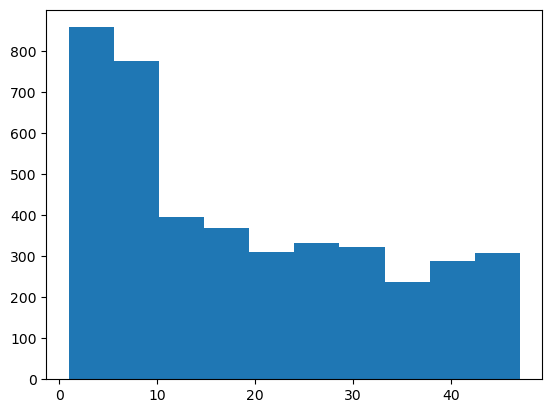

In [114]:
#顧客行動の各種統計量を把握
customer_join[['mean', 'median', 'max', 'min']].describe()

customer_join.groupby('routine_flg').count()['customer_id']

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(customer_join['membership_period'])
plt.show()

In [ ]:
#退会ユーザーと継続ユーザーの違いを把握
customer_end = customer_join.loc[customer_join['is_deleted'] == 1]
customer_end.describe()

customer_stay = customer_join.loc[customer_join['is_deleted']== 0]
customer_stay.describe()

In [124]:
customer_join.to_csv('customer_join.csv', index = False)